In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
os.getcwd()

'C:\\Users\\Admin\\21_PBL_ML\\MINI2'

In [3]:
df = pd.read_csv("./DATA-2/2011-2012 전력 시간별.csv", encoding='cp949')

In [4]:
df

,H_ID,HA,ST_DATE,APT_TF,M2,PersonCount,PointName,H01,H02,H03,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,1,전력총합,2011-12-10,아파트,20평~29평,2인이하,전력총합,0.174,0.153,0.135,...,0.119,0.158,0.237,0.155,0.402,0.417,0.412,0.258,0.282,0.142
1,1,전력총합,2011-12-11,아파트,20평~29평,2인이하,전력총합,0.100,0.139,0.099,...,0.278,0.232,0.216,0.227,0.349,0.291,0.295,0.247,0.236,0.402
2,1,전력총합,2011-12-12,아파트,20평~29평,2인이하,전력총합,0.100,0.104,0.087,...,0.096,0.097,0.097,0.093,0.089,0.088,0.180,0.377,0.354,0.100
3,1,전력총합,2011-12-13,아파트,20평~29평,2인이하,전력총합,0.100,0.143,0.096,...,0.089,0.088,0.089,0.078,0.319,0.242,0.396,0.413,0.387,0.253
4,1,전력총합,2011-12-14,아파트,20평~29평,2인이하,전력총합,0.081,0.127,0.132,...,0.090,0.089,0.089,0.089,0.090,0.198,0.186,0.436,0.394,0.229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159890,263,셋톱박스,2012-10-11,비아파트,20평~29평,2인이하,셋톱박스,0.006,0.005,0.005,...,0.006,0.006,0.006,0.007,0.006,0.006,0.007,0.006,0.006,0.005
159891,263,충전기,2012-10-11,비아파트,20평~29평,2인이하,충전기,0.008,0.007,0.007,...,0.008,0.007,0.008,0.008,0.008,0.008,0.008,0.007,0.007,0.007
159892,264,데스크탑,2012-10-01,비아파트,20평~29평,2인이하,컴퓨터,0.004,0.004,0.004,...,0.004,0.004,0.004,0.005,0.004,0.034,0.074,0.081,0.075,0.055
159893,264,전력총합,2012-10-01,비아파트,20평~29평,2인이하,전력총합,0.067,0.053,0.069,...,0.051,0.053,0.069,0.051,0.059,0.151,0.335,0.318,0.302,0.249


In [5]:
df['total'] = 0
df['total'] = df.iloc[:, 7:-1].sum(axis=1)

In [6]:
df.head(1)

,H_ID,HA,ST_DATE,APT_TF,M2,PersonCount,PointName,H01,H02,H03,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,total
0,1,전력총합,2011-12-10,아파트,20평~29평,2인이하,전력총합,0.174,0.153,0.135,...,0.158,0.237,0.155,0.402,0.417,0.412,0.258,0.282,0.142,4.354


In [7]:
time_cols = df.columns[7:-1]
time_cols

Index(['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10',
       'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20',
       'H21', 'H22', 'H23', 'H24'],
      dtype='object')

In [8]:
# 8월달 데이터 , 8월 15일 빼기 (공휴일인데 평일임)
df_8 = df[(df['ST_DATE'] > '2012-07-31') & (df['ST_DATE'] < '2012-09-01')]
df_8 = df_8[df_8['ST_DATE'] != '2012-08-15']

In [9]:
# 8월 데이터 중 전력총합만 뽑기
df_8_t = df_8.loc[df_8['HA']=='전력총합']

In [10]:
df_8_t

,H_ID,HA,ST_DATE,APT_TF,M2,PersonCount,PointName,H01,H02,H03,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,total
105795,1,전력총합,2012-08-01,아파트,20평~29평,2인이하,전력총합,0.131,0.156,0.127,...,0.104,0.105,0.114,0.128,0.657,1.550,1.165,0.181,0.958,6.779
105800,1,전력총합,2012-08-02,아파트,20평~29평,2인이하,전력총합,0.729,0.098,0.119,...,0.094,0.121,0.100,0.109,0.120,0.099,0.131,0.685,1.255,5.117
105805,1,전력총합,2012-08-03,아파트,20평~29평,2인이하,전력총합,1.496,0.552,0.148,...,0.102,0.107,0.109,0.107,0.129,0.105,0.126,0.115,0.793,5.310
105810,1,전력총합,2012-08-04,아파트,20평~29평,2인이하,전력총합,1.328,0.250,0.196,...,0.160,0.262,0.200,0.214,0.234,0.185,0.218,1.057,0.531,7.678
105816,1,전력총합,2012-08-06,아파트,20평~29평,2인이하,전력총합,1.307,0.427,0.141,...,0.109,0.119,0.114,0.118,0.172,0.230,0.198,0.194,1.170,5.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127082,246,전력총합,2012-08-29,비아파트,30평~39평이상,2인이하,전력총합,0.230,0.268,0.225,...,0.447,0.448,0.468,0.694,0.575,0.382,0.396,0.306,0.317,8.638
127089,246,전력총합,2012-08-30,비아파트,30평~39평이상,2인이하,전력총합,0.295,0.309,0.295,...,0.731,0.721,0.716,0.635,0.369,0.220,0.295,0.297,0.294,10.248
127094,246,전력총합,2012-08-31,비아파트,30평~39평이상,2인이하,전력총합,0.341,0.265,0.339,...,0.216,0.363,0.227,0.257,0.235,0.243,0.270,0.227,0.261,7.156
127126,247,전력총합,2012-08-31,아파트,30평~39평이상,2인이하,전력총합,0.373,0.388,0.349,...,0.656,0.654,0.376,0.646,0.651,0.632,0.662,0.627,0.706,11.324


In [11]:
tmp = pd.DataFrame(df_8_t['H_ID'].value_counts())

In [12]:
index = tmp[tmp['H_ID']>21].reset_index()['index']

In [13]:
index = np.array(index)

In [14]:
index.sort()
index

array([  1,   4,   6,  10,  11,  12,  14,  19,  24,  28,  29,  30,  31,
        33,  34,  36,  39,  40,  41,  43,  45,  47,  49,  51,  52,  54,
        55,  56,  67,  69,  71,  72,  74,  77,  81,  83,  84,  88,  89,
        91,  93,  95,  98,  99, 104, 106, 107, 111, 113, 115, 118, 129,
       130, 134, 135, 136, 142, 143, 145, 153, 155, 159, 160, 162, 163,
       164, 165, 167, 168, 170, 172, 173, 174, 175, 176, 178, 179, 180,
       182, 183, 186, 187, 190, 192, 195, 196, 197, 198, 200, 202, 203,
       204, 206, 208, 209, 211, 212, 213, 215, 216, 217, 220, 221, 224,
       226, 227, 233, 236], dtype=int64)

In [15]:
df_8_t = df_8_t[df_8_t['H_ID'].apply(lambda x : x in index)]

In [16]:
# H_ID 로 groupby. 전력량 sum으로
df_8_sum = df_8_t.groupby('H_ID').sum().reset_index()

In [17]:
df_8_sum

,H_ID,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,total
0,1,14.226,6.716,5.234,5.059,3.959,4.254,3.832,4.061,4.367,...,3.552,3.817,4.334,4.153,5.969,7.108,7.813,8.512,11.514,132.129
1,4,8.221,6.951,6.878,6.855,6.573,6.824,6.980,8.744,9.733,...,10.170,10.171,10.453,10.741,14.052,15.167,15.843,14.954,12.452,244.668
2,6,7.946,7.223,8.023,6.817,6.954,6.765,7.609,10.609,11.255,...,18.340,19.885,23.533,26.048,22.583,18.513,20.078,13.461,10.641,343.540
3,10,6.335,6.090,5.854,5.568,5.370,5.435,5.857,6.006,5.871,...,5.107,4.922,5.032,5.596,5.987,6.021,6.190,6.162,6.229,136.940
4,11,11.626,9.786,8.746,7.981,7.943,7.393,7.372,9.484,11.519,...,7.612,7.937,8.024,8.577,9.493,9.620,11.483,12.457,13.422,224.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,224,6.789,5.989,6.078,5.822,5.353,4.699,4.439,4.606,4.302,...,4.560,4.558,5.198,6.001,6.119,6.647,6.746,7.619,7.572,131.701
104,226,25.669,21.445,17.235,14.703,14.509,13.872,14.715,17.892,20.261,...,25.501,25.601,25.879,24.775,26.383,26.985,27.065,28.598,28.609,545.548
105,227,9.878,6.106,5.517,5.374,5.469,5.288,5.163,6.339,7.411,...,5.996,6.076,5.968,7.424,8.691,10.816,14.300,13.552,13.609,186.655
106,233,12.003,10.073,8.470,7.895,7.740,7.396,8.914,13.221,21.381,...,20.255,20.105,18.511,23.776,27.596,22.996,17.115,14.609,12.853,404.176


In [18]:
# H_ID 로 groupby. 전력량 mean으로
df_8_mean = df_8_t.groupby('H_ID').mean()

In [19]:
# H_ID 로 groupby. 전력량 median으로
df_8_median = df_8_t.groupby('H_ID').median()

In [20]:
# total 버리기
df_8_sum = df_8_sum.drop('total', axis=1)

In [21]:
from sklearn.cluster import KMeans

In [22]:
def change_n_clusters(n_clusters,data):
    sum_of_squared_distance=[]
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        #KMeans 모델이 학습된 후에, model.inertia_ 값으로 뽑아 볼 수 있다. 
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 1)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

In [23]:
df_8_sum.head(1)

,H_ID,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,1,14.226,6.716,5.234,5.059,3.959,4.254,3.832,4.061,4.367,...,3.724,3.552,3.817,4.334,4.153,5.969,7.108,7.813,8.512,11.514


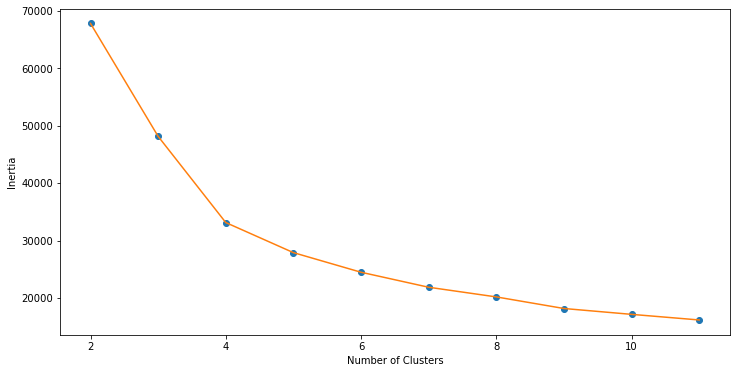

In [24]:
change_n_clusters([2,3,4,5,6,7,8,9,10,11], df_8_sum.iloc[:,1:])

In [25]:
# kmeans 유클리드 거리
kmeans = KMeans(n_clusters=8, random_state=2)
km_cluster = kmeans.fit_predict(df_8_sum.iloc[:, 1:])

In [26]:
km_cluster

array([5, 1, 3, 5, 1, 0, 1, 3, 3, 0, 3, 1, 0, 1, 1, 3, 0, 3, 3, 3, 0, 3,
       7, 3, 3, 6, 7, 1, 2, 0, 3, 6, 7, 4, 1, 3, 3, 3, 3, 1, 3, 6, 7, 0,
       6, 0, 1, 1, 6, 0, 1, 6, 3, 3, 1, 3, 0, 1, 0, 1, 3, 1, 0, 1, 0, 0,
       0, 3, 0, 6, 3, 6, 4, 1, 3, 1, 5, 3, 1, 0, 3, 6, 3, 6, 3, 3, 0, 7,
       5, 7, 3, 3, 5, 0, 1, 0, 0, 5, 0, 0, 4, 3, 7, 5, 6, 1, 3, 3])

In [27]:
df_clust = df_8_sum.copy()
df_clust['km_cluster'] = km_cluster

In [28]:
# 비교는 밑에서 해주삼
df_clust

,H_ID,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,km_cluster
0,1,14.226,6.716,5.234,5.059,3.959,4.254,3.832,4.061,4.367,...,3.552,3.817,4.334,4.153,5.969,7.108,7.813,8.512,11.514,5
1,4,8.221,6.951,6.878,6.855,6.573,6.824,6.980,8.744,9.733,...,10.170,10.171,10.453,10.741,14.052,15.167,15.843,14.954,12.452,1
2,6,7.946,7.223,8.023,6.817,6.954,6.765,7.609,10.609,11.255,...,18.340,19.885,23.533,26.048,22.583,18.513,20.078,13.461,10.641,3
3,10,6.335,6.090,5.854,5.568,5.370,5.435,5.857,6.006,5.871,...,5.107,4.922,5.032,5.596,5.987,6.021,6.190,6.162,6.229,5
4,11,11.626,9.786,8.746,7.981,7.943,7.393,7.372,9.484,11.519,...,7.612,7.937,8.024,8.577,9.493,9.620,11.483,12.457,13.422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,224,6.789,5.989,6.078,5.822,5.353,4.699,4.439,4.606,4.302,...,4.560,4.558,5.198,6.001,6.119,6.647,6.746,7.619,7.572,5
104,226,25.669,21.445,17.235,14.703,14.509,13.872,14.715,17.892,20.261,...,25.501,25.601,25.879,24.775,26.383,26.985,27.065,28.598,28.609,6
105,227,9.878,6.106,5.517,5.374,5.469,5.288,5.163,6.339,7.411,...,5.996,6.076,5.968,7.424,8.691,10.816,14.300,13.552,13.609,1
106,233,12.003,10.073,8.470,7.895,7.740,7.396,8.914,13.221,21.381,...,20.255,20.105,18.511,23.776,27.596,22.996,17.115,14.609,12.853,3


In [29]:
from sklearn.preprocessing import Normalizer

In [30]:
# normalizer로 스케일링 후 kmeans (코사인 유사도 하는거랑 비슷하다함)
nom = Normalizer()
normal_df = nom.fit_transform(df_8_sum.iloc[:, 1:])

In [31]:
normal_df = pd.DataFrame(normal_df, columns=time_cols)
normal_df

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,0.475924,0.224681,0.175101,0.169247,0.132447,0.142316,0.128198,0.135859,0.146096,0.145996,...,0.124585,0.118831,0.127696,0.144992,0.138937,0.199690,0.237795,0.261380,0.284765,0.385196
1,0.159128,0.134546,0.133133,0.132687,0.127229,0.132087,0.135107,0.169251,0.188395,0.208467,...,0.209474,0.196854,0.196873,0.202331,0.207906,0.271995,0.293577,0.306662,0.289454,0.241025
2,0.104750,0.095219,0.105765,0.089867,0.091673,0.089181,0.100307,0.139856,0.148372,0.151562,...,0.252937,0.241771,0.262139,0.310229,0.343384,0.297706,0.244052,0.264683,0.177453,0.140278
3,0.226105,0.217361,0.208938,0.198730,0.191663,0.193983,0.209045,0.214363,0.209544,0.199658,...,0.187666,0.182276,0.175673,0.179599,0.199729,0.213685,0.214898,0.220930,0.219931,0.222322
4,0.249939,0.210382,0.188024,0.171577,0.170761,0.158936,0.158485,0.203889,0.247638,0.208103,...,0.159603,0.163645,0.170632,0.172502,0.184390,0.204083,0.206813,0.246864,0.267804,0.288549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.248390,0.219120,0.222376,0.213010,0.195851,0.171923,0.162410,0.168520,0.157398,0.160544,...,0.189265,0.166837,0.166764,0.190180,0.219559,0.223876,0.243194,0.246816,0.278757,0.277037
104,0.225830,0.188668,0.151629,0.129353,0.127647,0.122042,0.129459,0.157409,0.178251,0.215624,...,0.212571,0.224351,0.225231,0.227677,0.217964,0.232111,0.237407,0.238111,0.251598,0.251695
105,0.245065,0.151485,0.136872,0.133324,0.135681,0.131191,0.128090,0.157265,0.183861,0.181281,...,0.156447,0.148756,0.150740,0.148061,0.184183,0.215616,0.268336,0.354771,0.336214,0.337628
106,0.136880,0.114870,0.096590,0.090033,0.088265,0.084343,0.101653,0.150770,0.243825,0.280271,...,0.225396,0.230984,0.229273,0.211096,0.271137,0.314699,0.262242,0.195176,0.166598,0.146573


In [32]:
# cos유사도
kmeans = KMeans(n_clusters=8, random_state=2)
km_cluster_cos = kmeans.fit_predict(normal_df.iloc[:, 1:])

In [33]:
df_clust_cos = df_8_sum.copy()
df_clust_cos['km_cluster'] = km_cluster_cos

In [34]:
df_clust_cos

,H_ID,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,km_cluster
0,1,14.226,6.716,5.234,5.059,3.959,4.254,3.832,4.061,4.367,...,3.552,3.817,4.334,4.153,5.969,7.108,7.813,8.512,11.514,3
1,4,8.221,6.951,6.878,6.855,6.573,6.824,6.980,8.744,9.733,...,10.170,10.171,10.453,10.741,14.052,15.167,15.843,14.954,12.452,4
2,6,7.946,7.223,8.023,6.817,6.954,6.765,7.609,10.609,11.255,...,18.340,19.885,23.533,26.048,22.583,18.513,20.078,13.461,10.641,5
3,10,6.335,6.090,5.854,5.568,5.370,5.435,5.857,6.006,5.871,...,5.107,4.922,5.032,5.596,5.987,6.021,6.190,6.162,6.229,6
4,11,11.626,9.786,8.746,7.981,7.943,7.393,7.372,9.484,11.519,...,7.612,7.937,8.024,8.577,9.493,9.620,11.483,12.457,13.422,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,224,6.789,5.989,6.078,5.822,5.353,4.699,4.439,4.606,4.302,...,4.560,4.558,5.198,6.001,6.119,6.647,6.746,7.619,7.572,7
104,226,25.669,21.445,17.235,14.703,14.509,13.872,14.715,17.892,20.261,...,25.501,25.601,25.879,24.775,26.383,26.985,27.065,28.598,28.609,4
105,227,9.878,6.106,5.517,5.374,5.469,5.288,5.163,6.339,7.411,...,5.996,6.076,5.968,7.424,8.691,10.816,14.300,13.552,13.609,0
106,233,12.003,10.073,8.470,7.895,7.740,7.396,8.914,13.221,21.381,...,20.255,20.105,18.511,23.776,27.596,22.996,17.115,14.609,12.853,5


In [35]:
# 0 = 유클리드
# 1 = 코사인 유사도
pd.DataFrame([km_cluster, km_cluster_cos]).T

,0,1
0,5,3
1,1,4
2,3,5
3,5,6
4,1,6
...,...,...
103,5,7
104,6,4
105,1,0
106,3,5


In [36]:
# 유클리드 kmeans 그룹별 개수
print(len(df_clust.loc[df_clust['km_cluster']==0]))
print(len(df_clust.loc[df_clust['km_cluster']==1]))
print(len(df_clust.loc[df_clust['km_cluster']==2]))
print(len(df_clust.loc[df_clust['km_cluster']==3]))
print(len(df_clust.loc[df_clust['km_cluster']==4]))
print(len(df_clust.loc[df_clust['km_cluster']==5]))
print(len(df_clust.loc[df_clust['km_cluster']==6]))
print(len(df_clust.loc[df_clust['km_cluster']==7]))


23
22
1
34
3
7
11
7


In [56]:
kmcluster0=np.array(df_clust.loc[df_clust['km_cluster']==0,'H_ID'])
kmcluster1=np.array(df_clust.loc[df_clust['km_cluster']==1,'H_ID'])
kmcluster2=np.array(df_clust.loc[df_clust['km_cluster']==2,'H_ID'])
kmcluster3=np.array(df_clust.loc[df_clust['km_cluster']==3,'H_ID'])
kmcluster4=np.array(df_clust.loc[df_clust['km_cluster']==4,'H_ID'])
kmcluster5=np.array(df_clust.loc[df_clust['km_cluster']==5,'H_ID'])
kmcluster6=np.array(df_clust.loc[df_clust['km_cluster']==6,'H_ID'])
kmcluster7=np.array(df_clust.loc[df_clust['km_cluster']==7,'H_ID'])

In [55]:
coscluster0=np.array(df_clust_cos.loc[df_clust_cos['km_cluster']==0,'H_ID'])
coscluster1=np.array(df_clust_cos.loc[df_clust_cos['km_cluster']==1,'H_ID'])
coscluster2=np.array(df_clust_cos.loc[df_clust_cos['km_cluster']==2,'H_ID'])
coscluster3=np.array(df_clust_cos.loc[df_clust_cos['km_cluster']==3,'H_ID'])
coscluster4=np.array(df_clust_cos.loc[df_clust_cos['km_cluster']==4,'H_ID'])
coscluster5=np.array(df_clust_cos.loc[df_clust_cos['km_cluster']==5,'H_ID'])
coscluster6=np.array(df_clust_cos.loc[df_clust_cos['km_cluster']==6,'H_ID'])
coscluster7=np.array(df_clust_cos.loc[df_clust_cos['km_cluster']==7,'H_ID'])

In [64]:
df_8_t['클러스터']=0
for i in df_8_t['H_ID'].unique():
    if i in kmcluster1:
        df_8_t.loc[df['H_ID']==i,'클러스터'] = 1
    if i in kmcluster2:
        df_8_t.loc[df['H_ID']==i,'클러스터'] = 2
    if i in kmcluster3:
        df_8_t.loc[df['H_ID']==i,'클러스터'] = 3
    if i in kmcluster4:
        df_8_t.loc[df['H_ID']==i,'클러스터'] = 4
    if i in kmcluster5:
        df_8_t.loc[df['H_ID']==i,'클러스터'] = 5
    if i in kmcluster6:
        df_8_t.loc[df['H_ID']==i,'클러스터'] = 6
    if i in kmcluster7:
        df_8_t.loc[df['H_ID']==i,'클러스터'] = 7


<ipython-input-64-1df66597536b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8_t['클러스터']=0
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [65]:
df_8_t['cos 클러스터']=0
for i in df_8_t['H_ID'].unique():
    if i in coscluster1:
        df_8_t.loc[df['H_ID']==i,'cos 클러스터'] = 1
    if i in coscluster2:
        df_8_t.loc[df['H_ID']==i,'cos 클러스터'] = 2
    if i in coscluster3:
        df_8_t.loc[df['H_ID']==i,'cos 클러스터'] = 3
    if i in coscluster4:
        df_8_t.loc[df['H_ID']==i,'cos 클러스터'] = 4
    if i in coscluster5:
        df_8_t.loc[df['H_ID']==i,'cos 클러스터'] = 5
    if i in coscluster6:
        df_8_t.loc[df['H_ID']==i,'cos 클러스터'] = 6
    if i in coscluster7:
        df_8_t.loc[df['H_ID']==i,'cos 클러스터'] = 7


<ipython-input-65-f05e53f1591a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8_t['cos 클러스터']=0
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [66]:
df_8_t

,H_ID,HA,ST_DATE,APT_TF,M2,PersonCount,PointName,H01,H02,H03,...,H18,H19,H20,H21,H22,H23,H24,total,클러스터,cos 클러스터
105795,1,전력총합,2012-08-01,아파트,20평~29평,2인이하,전력총합,0.131,0.156,0.127,...,0.114,0.128,0.657,1.550,1.165,0.181,0.958,6.779,5,3
105800,1,전력총합,2012-08-02,아파트,20평~29평,2인이하,전력총합,0.729,0.098,0.119,...,0.100,0.109,0.120,0.099,0.131,0.685,1.255,5.117,5,3
105805,1,전력총합,2012-08-03,아파트,20평~29평,2인이하,전력총합,1.496,0.552,0.148,...,0.109,0.107,0.129,0.105,0.126,0.115,0.793,5.310,5,3
105810,1,전력총합,2012-08-04,아파트,20평~29평,2인이하,전력총합,1.328,0.250,0.196,...,0.200,0.214,0.234,0.185,0.218,1.057,0.531,7.678,5,3
105816,1,전력총합,2012-08-06,아파트,20평~29평,2인이하,전력총합,1.307,0.427,0.141,...,0.114,0.118,0.172,0.230,0.198,0.194,1.170,5.807,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126729,236,전력총합,2012-08-27,비아파트,30평~39평이상,3인,전력총합,0.353,0.367,0.354,...,0.520,1.633,1.235,0.581,0.557,0.601,0.464,11.820,3,4
126734,236,전력총합,2012-08-28,비아파트,30평~39평이상,3인,전력총합,0.426,0.379,0.335,...,0.398,0.527,0.567,0.568,0.490,0.653,0.762,12.038,3,4
126739,236,전력총합,2012-08-29,비아파트,30평~39평이상,3인,전력총합,0.457,0.406,0.383,...,0.480,0.540,0.783,0.609,0.642,0.640,0.685,11.877,3,4
126744,236,전력총합,2012-08-30,비아파트,30평~39평이상,3인,전력총합,0.610,0.427,0.432,...,0.390,0.395,0.741,0.579,0.560,0.564,0.563,11.335,3,4


In [72]:
df_8_t.to_csv('df_8_t.csv', index=False ,encoding='cp949')

In [37]:
# 코사인 kmeans 그룹별 개수
print(len(df_clust_cos.loc[df_clust_cos['km_cluster']==0]))
print(len(df_clust_cos.loc[df_clust_cos['km_cluster']==1]))
print(len(df_clust_cos.loc[df_clust_cos['km_cluster']==2]))
print(len(df_clust_cos.loc[df_clust_cos['km_cluster']==3]))
print(len(df_clust_cos.loc[df_clust_cos['km_cluster']==4]))
print(len(df_clust_cos.loc[df_clust_cos['km_cluster']==5]))
print(len(df_clust_cos.loc[df_clust_cos['km_cluster']==6]))
print(len(df_clust_cos.loc[df_clust_cos['km_cluster']==7]))
print(len(df_clust_cos.loc[df_clust_cos['km_cluster']==8]))
print(len(df_clust_cos.loc[df_clust_cos['km_cluster']==9]))


21
3
10
5
24
10
22
13
0
0


In [38]:
# 코사인 유사도에서 3개
df_clust_cos[df_clust_cos['km_cluster']==1]

,H_ID,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,km_cluster
78,182,18.256,15.117,13.031,11.388,11.232,11.042,9.821,10.853,9.592,...,10.429,9.070,9.487,10.570,9.737,10.150,10.970,17.989,20.329,1
92,206,6.584,4.846,3.261,3.143,3.064,3.595,3.336,3.601,6.371,...,2.937,3.026,2.886,2.671,2.768,3.201,5.518,8.254,8.180,1
97,213,10.157,5.290,3.593,3.136,3.105,4.155,4.056,2.787,2.305,...,4.555,4.322,3.076,2.681,4.476,4.190,5.673,9.234,12.664,1


In [39]:
# 코사인 유사도에서 5개
df_clust_cos[df_clust_cos['km_cluster']==3]

,H_ID,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,km_cluster
0,1,14.226,6.716,5.234,5.059,3.959,4.254,3.832,4.061,4.367,...,3.552,3.817,4.334,4.153,5.969,7.108,7.813,8.512,11.514,3
47,111,21.522,19.139,15.800,14.381,12.741,8.240,7.251,4.831,5.025,...,6.129,6.765,6.282,8.415,10.221,14.381,18.100,17.108,20.878,3
54,135,13.555,11.818,10.338,9.269,9.042,8.561,8.759,10.250,5.851,...,5.196,5.003,5.307,6.853,9.745,10.283,11.596,13.379,13.720,3
59,153,15.740,13.565,12.087,10.954,10.652,10.062,10.272,11.881,6.424,...,5.650,5.488,5.910,7.498,10.633,11.448,13.313,15.453,15.927,3
63,162,11.890,11.823,11.047,9.720,10.186,9.157,9.364,10.864,11.384,...,7.033,6.643,6.715,6.224,7.290,9.969,13.342,13.734,12.679,3


In [41]:
df_clust_cos

,H_ID,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,km_cluster
0,1,14.226,6.716,5.234,5.059,3.959,4.254,3.832,4.061,4.367,...,3.552,3.817,4.334,4.153,5.969,7.108,7.813,8.512,11.514,3
1,4,8.221,6.951,6.878,6.855,6.573,6.824,6.980,8.744,9.733,...,10.170,10.171,10.453,10.741,14.052,15.167,15.843,14.954,12.452,4
2,6,7.946,7.223,8.023,6.817,6.954,6.765,7.609,10.609,11.255,...,18.340,19.885,23.533,26.048,22.583,18.513,20.078,13.461,10.641,5
3,10,6.335,6.090,5.854,5.568,5.370,5.435,5.857,6.006,5.871,...,5.107,4.922,5.032,5.596,5.987,6.021,6.190,6.162,6.229,6
4,11,11.626,9.786,8.746,7.981,7.943,7.393,7.372,9.484,11.519,...,7.612,7.937,8.024,8.577,9.493,9.620,11.483,12.457,13.422,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,224,6.789,5.989,6.078,5.822,5.353,4.699,4.439,4.606,4.302,...,4.560,4.558,5.198,6.001,6.119,6.647,6.746,7.619,7.572,7
104,226,25.669,21.445,17.235,14.703,14.509,13.872,14.715,17.892,20.261,...,25.501,25.601,25.879,24.775,26.383,26.985,27.065,28.598,28.609,4
105,227,9.878,6.106,5.517,5.374,5.469,5.288,5.163,6.339,7.411,...,5.996,6.076,5.968,7.424,8.691,10.816,14.300,13.552,13.609,0
106,233,12.003,10.073,8.470,7.895,7.740,7.396,8.914,13.221,21.381,...,20.255,20.105,18.511,23.776,27.596,22.996,17.115,14.609,12.853,5


In [40]:
km_cluster_cos

array([3, 4, 5, 6, 6, 0, 6, 7, 4, 0, 0, 6, 4, 0, 4, 6, 4, 7, 6, 4, 7, 7,
       0, 6, 6, 5, 0, 6, 5, 4, 4, 5, 0, 6, 6, 2, 6, 4, 6, 7, 4, 2, 0, 5,
       6, 0, 4, 3, 5, 5, 2, 2, 2, 4, 3, 7, 0, 4, 0, 3, 5, 7, 7, 3, 0, 7,
       0, 7, 0, 5, 4, 4, 6, 4, 0, 6, 6, 2, 1, 2, 6, 4, 2, 6, 0, 4, 7, 0,
       4, 0, 4, 4, 1, 7, 6, 6, 0, 1, 4, 2, 6, 2, 0, 7, 4, 0, 5, 4])

In [44]:
df_8_t['km_cluster'] = 0
for i in df_clust_cos['H_ID'].unique():
    if df_8_t['H_ID']==i:
        df_8_t['km_cluster']=df_clust_cos['km_cluster']

<ipython-input-44-21032c43f691>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8_t['km_cluster'] = 0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df['클러스터']=0
for i in df['H_ID'].unique():
    if i in uc_cluster1:
        df.loc[df['H_ID']==i,'클러스터'] = 1
    if i in uc_cluster2:
        df.loc[df['H_ID']==i,'클러스터'] = 2
    if i in uc_cluster3:
        df.loc[df['H_ID']==i,'클러스터'] = 3